<a href="https://colab.research.google.com/github/DeniseGGarcia/Projetos/blob/main/Formulas%20Proteicas%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats
from scipy.stats import norm
from scipy.stats import pearsonr, spearmanr
from tabulate import tabulate
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import statsmodels.api as sm
from scipy.stats import kruskal
import math


from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
file_id = '1VUDll_T1LXGFpMWbv8iydHrbUSVa4m42'
url = f'https://drive.google.com/uc?id={file_id}&export=download'

suplementos = pd.read_csv(url)

In [3]:
suplementos.head()

,id_produto,id_atleta,ganho_massa,idade,frequencia_treino
0,Fórmula 3,1,2.24,27,5
1,Fórmula 1,2,4.97,35,4
2,Fórmula 3,3,0.88,30,6
3,Fórmula 3,4,0.09,22,6
4,Fórmula 1,5,2.47,18,6


In [4]:
suplementos.isnull().sum()

,0
id_produto,0
id_atleta,0
ganho_massa,0
idade,0
frequencia_treino,0


In [30]:
total_atletas = suplementos['id_atleta'].sum()
print(total_atletas)

45150


In [5]:
suplementos.dtypes

,0
id_produto,object
id_atleta,int64
ganho_massa,float64
idade,int64
frequencia_treino,int64


In [6]:
suplementos.shape

(300, 5)

#1. Faça uma análise exploratória dos dados:
##● Qual é a média e a mediana do ganho de massa para cada suplemento?


In [7]:
# Calcular média e mediana por tipo de suplemento
resultados = suplementos.groupby('id_produto')['ganho_massa'].agg(['mean', 'median']).reset_index()

# Renomear as colunas para melhor apresentação
resultados.columns = ['Suplemento', 'Média do ganho de massa', 'Mediana do ganho de massa']

# Arredondar os valores para 2 casas decimais
resultados['Média do ganho de massa'] = resultados['Média do ganho de massa'].round(2)
resultados['Mediana do ganho de massa'] = resultados['Mediana do ganho de massa'].round(2)

# Exibir os resultados
print("Análise do ganho de massa por suplemento:\n")
print(resultados.to_string(index=False))



Análise do ganho de massa por suplemento:

Suplemento  Média do ganho de massa  Mediana do ganho de massa
 Fórmula 1                     2.66                       2.67
 Fórmula 2                     2.35                       2.15
 Fórmula 3                     2.39                       2.35


##● Como os dados estão distribuídos? Utilize histogramas e boxplots para visualizar as diferenças entre as fórmulas.

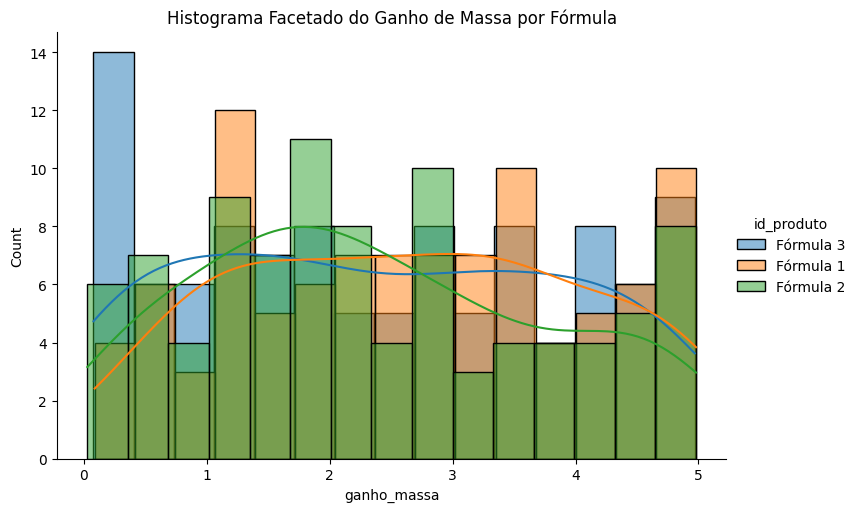

/tmp/ipython-input-8-2590317365.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=suplementos, x="id_produto", y="ganho_massa",palette='Set2')


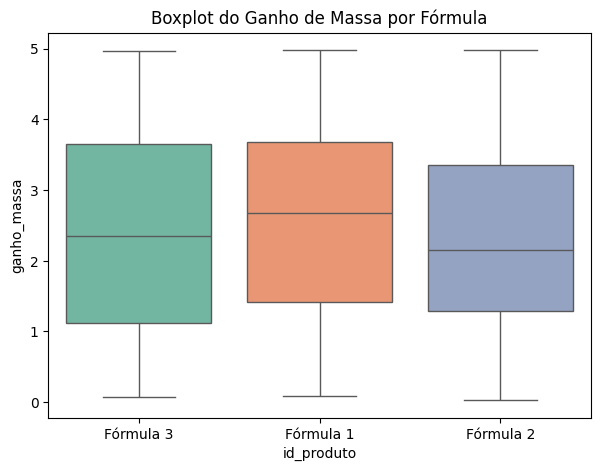

In [8]:
g = sns.FacetGrid(suplementos, hue="id_produto", height=5, aspect=1.5)
g.map(sns.histplot, "ganho_massa", bins=15, kde=True, alpha=0.5)
g.add_legend()
plt.title("Histograma Facetado do Ganho de Massa por Fórmula")
plt.show()

# Criar boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=suplementos, x="id_produto", y="ganho_massa",palette='Set2')
plt.title("Boxplot do Ganho de Massa por Fórmula")
plt.show()


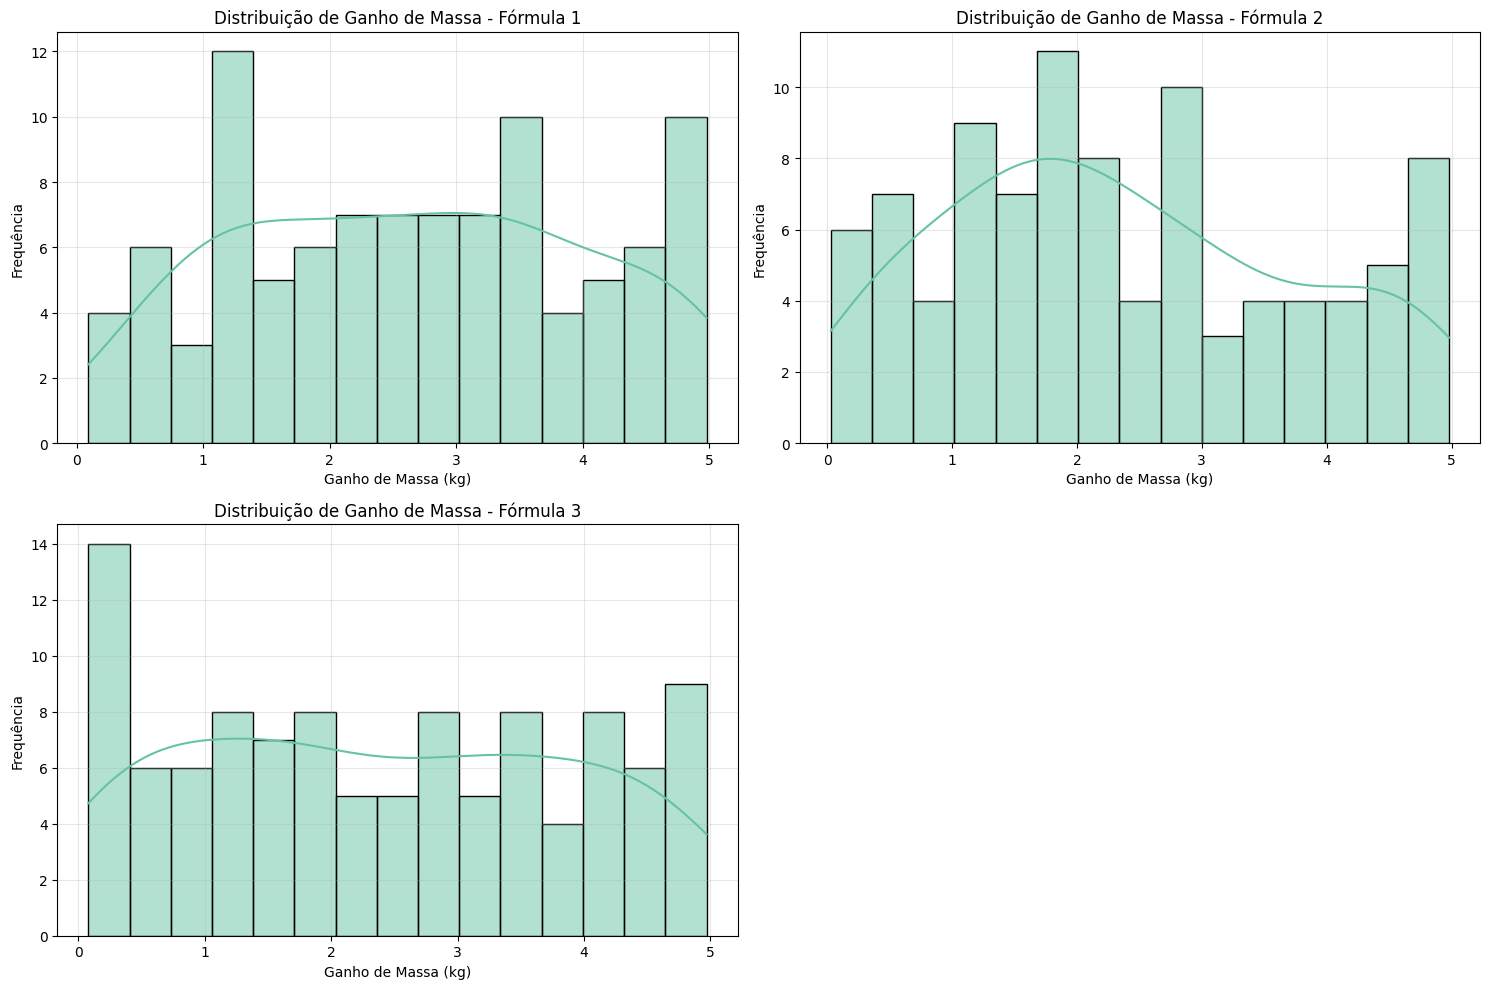

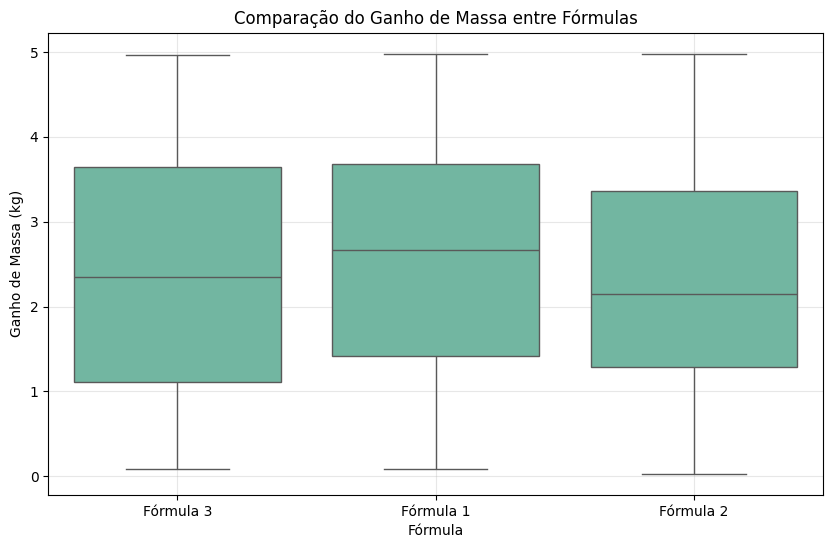

In [9]:
sns.set_palette("Set2")

# Criar histogramas separados para cada fórmula
formulas = suplementos['id_produto'].unique()

plt.figure(figsize=(15, 10))
for i, formula in enumerate(sorted(formulas), 1):
    plt.subplot(2, 2, i)
    subset = suplementos[suplementos['id_produto'] == formula]
    sns.histplot(subset['ganho_massa'], bins=15, kde=True)
    plt.title(f'Distribuição de Ganho de Massa - {formula}')
    plt.xlabel('Ganho de Massa (kg)')
    plt.ylabel('Frequência')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Criar boxplots para comparar as fórmulas
plt.figure(figsize=(10, 6))
sns.boxplot(x='id_produto', y='ganho_massa', data=suplementos)
plt.title('Comparação do Ganho de Massa entre Fórmulas')
plt.xlabel('Fórmula')
plt.ylabel('Ganho de Massa (kg)')
plt.grid(True, alpha=0.3)
plt.show()

Analisando o histograma e o boxplot, podemos perceber que o suplemento mais consistente, é o 1. Pois são valores que se mantém, a mediana é mais alta, e tem pouca variância, comparado aos outros 2 . Suplementos que tem uma variância maior, pode indicar que ele funcione para alguns atletas e não para outros

##● Há outliers no ganho de massa muscular? O que isso pode indicar?


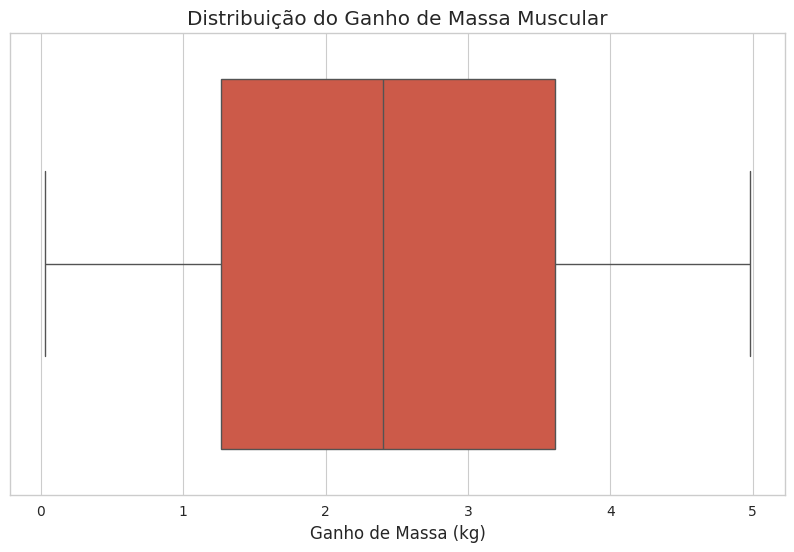

In [10]:
# Configurações de estilo
plt.style.use('ggplot')
sns.set_style("whitegrid")

# Boxplot para identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=suplementos['ganho_massa'])
plt.title('Distribuição do Ganho de Massa Muscular')
plt.xlabel('Ganho de Massa (kg)')
plt.show()

In [11]:
# Estatísticas descritivas
print(suplementos['ganho_massa'].describe())

# Identificação de outliers usando o método IQR
Q1 = suplementos['ganho_massa'].quantile(0.25)
Q3 = suplementos['ganho_massa'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = suplementos[(suplementos['ganho_massa'] < limite_inferior) | (suplementos['ganho_massa'] > limite_superior)]
print(f"\nNúmero de outliers: {len(outliers)}")
print(f"Porcentagem de outliers: {len(outliers)/len(suplementos)*100:.2f}%")

count    300.000000
mean       2.466733
std        1.436384
min        0.030000
25%        1.267500
50%        2.400000
75%        3.612500
max        4.980000
Name: ganho_massa, dtype: float64

Número de outliers: 0
Porcentagem de outliers: 0.00%


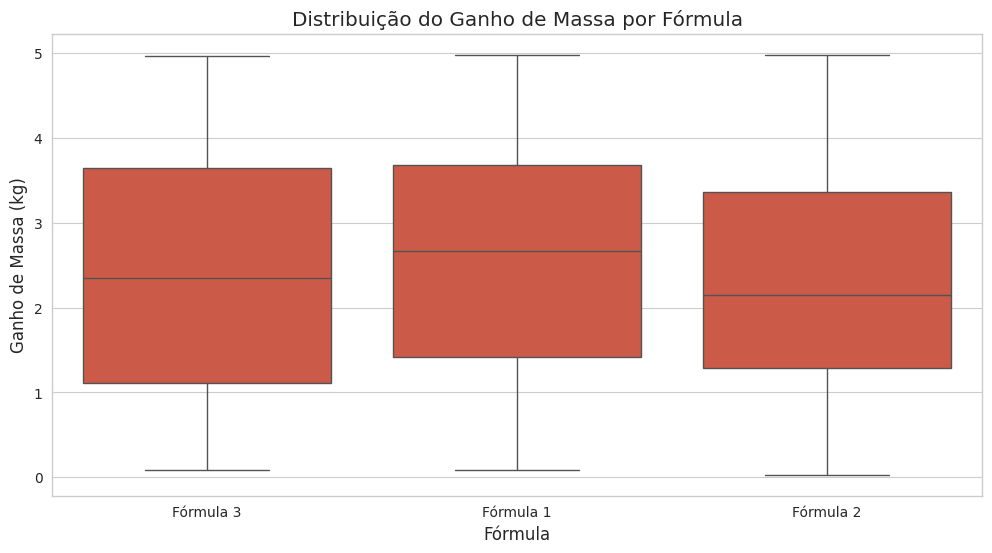


Fórmula Fórmula 3: 0 outliers
Empty DataFrame
Columns: [id_atleta, ganho_massa, idade, frequencia_treino]
Index: []

Fórmula Fórmula 1: 0 outliers
Empty DataFrame
Columns: [id_atleta, ganho_massa, idade, frequencia_treino]
Index: []

Fórmula Fórmula 2: 0 outliers
Empty DataFrame
Columns: [id_atleta, ganho_massa, idade, frequencia_treino]
Index: []


In [12]:
# Boxplot por tipo de fórmula
plt.figure(figsize=(12, 6))
sns.boxplot(x='id_produto', y='ganho_massa', data=suplementos)
plt.title('Distribuição do Ganho de Massa por Fórmula')
plt.xlabel('Fórmula')
plt.ylabel('Ganho de Massa (kg)')
plt.show()

# Outliers por fórmula
for formula in suplementos['id_produto'].unique():
    subset = suplementos[suplementos['id_produto'] == formula]
    Q1 = subset['ganho_massa'].quantile(0.25)
    Q3 = subset['ganho_massa'].quantile(0.75)
    IQR = Q3 - Q1

    outliers_formula = subset[(subset['ganho_massa'] < (Q1 - 1.5*IQR)) |
                          (subset['ganho_massa'] > (Q3 + 1.5*IQR))]

    print(f"\nFórmula {formula}: {len(outliers_formula)} outliers")
    print(outliers_formula[['id_atleta', 'ganho_massa', 'idade', 'frequencia_treino']])

#2. Há diferença estatisticamente significativa no ganho de massa muscular entre as três fórmulas?


Teste ANOVA

In [13]:
# Separar os dados por fórmula
formula1 = suplementos[suplementos['id_produto'] == 'Fórmula 1']['ganho_massa']
formula2 = suplementos[suplementos['id_produto'] == 'Fórmula 2']['ganho_massa']
formula3 = suplementos[suplementos['id_produto'] == 'Fórmula 3']['ganho_massa']

# Realizar o teste ANOVA
f_statistic, p_value = stats.f_oneway(formula1, formula2, formula3)

# Exibir os resultados
print(f"Estatística F: {f_statistic}")
print(f"Valor-p: {p_value}")

# Interpretação
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H0: Há diferença significativa no ganho de massa entre pelo menos duas das fórmulas.")
else:
    print("Não rejeitamos H0: Não há diferença significativa no ganho de massa entre as fórmulas.")



Estatística F: 1.316081351251297
Valor-p: 0.26974352074161734
Não rejeitamos H0: Não há diferença significativa no ganho de massa entre as fórmulas.


Teste Kruskal-Wallis (Não paramétrico)

In [14]:
# Realizar o teste Kruskal-Wallis
statistic, p_value = kruskal(formula1, formula2, formula3)

# Exibir resultados
print(f"Estatística H: {statistic}")
print(f"Valor-p: {p_value}")

# Interpretação
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H₀: Há diferença significativa nas medianas do ganho de massa entre pelo menos duas fórmulas.")
else:
    print("Não rejeitamos H₀: Não há diferença significativa nas medianas entre as fórmulas.")


Estatística H: 2.647317440274794
Valor-p: 0.26615971444627673
Não rejeitamos H₀: Não há diferença significativa nas medianas entre as fórmulas.


#3. Existe correlação entre idade e ganho de massa muscular? Atletas mais jovens ou mais velhos têm resultados diferentes?

In [15]:
# Teste de Spearman (não paramétrico para correlação)
corr, p_value = spearmanr(suplementos['idade'], suplementos['ganho_massa'])

print(f"Coeficiente de Spearman (ρ): {corr:.3f}")
print(f"Valor-p: {p_value}")

# Interpretação
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H₀: Há correlação significativa entre idade e ganho de massa.")
    if corr > 0:
        print("Correlação positiva: ganho de massa tende a aumentar com a idade.")
    elif corr < 0:
        print("Correlação negativa: ganho de massa tende a diminuir com a idade.")
else:
    print("Não rejeitamos H₀: Não há correlação significativa.")

Coeficiente de Spearman (ρ): -0.077
Valor-p: 0.18471970555725858
Não rejeitamos H₀: Não há correlação significativa.


In [16]:
# Criar grupos (exemplo: jovens <30 anos vs. velhos ≥30 anos)
jovens = suplementos[suplementos['idade'] < 30]['ganho_massa']
velhos = suplementos[suplementos['idade'] >= 30]['ganho_massa']

# Teste de Kruskal-Wallis para diferença entre grupos
statistic, p_value = kruskal(jovens, velhos)

print(f"\nTeste Kruskal-Wallis (Jovens vs. Velhos):")
print(f"Estatística H: {statistic:.3f}, Valor-p: {p_value}")

if p_value < alpha:
    print("Rejeitamos H₀: Há diferença significativa no ganho de massa entre os grupos.")
else:
    print("Não rejeitamos H₀: Não há diferença significativa.")


Teste Kruskal-Wallis (Jovens vs. Velhos):
Estatística H: 0.631, Valor-p: 0.4268698791370136
Não rejeitamos H₀: Não há diferença significativa.


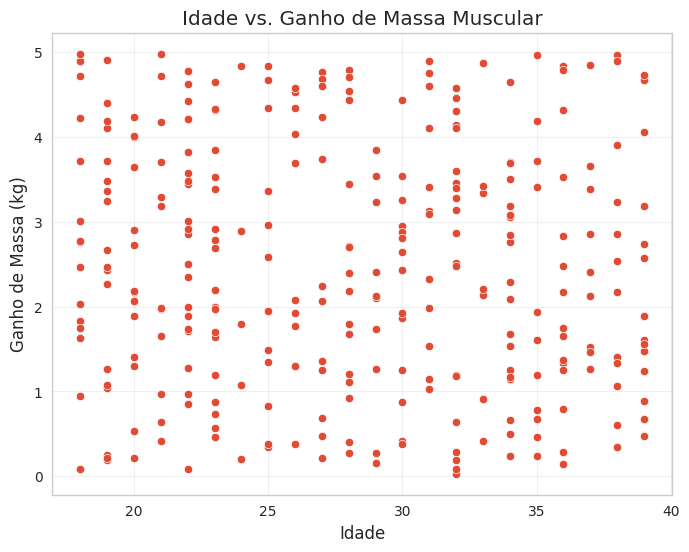

Coeficiente de Correlação de Pearson: -0.07
Valor-p: 0.2052
Não existe correlação estatisticamente significativa entre idade e ganho de massa muscular.


In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=suplementos, x='idade', y='ganho_massa')
plt.title('Idade vs. Ganho de Massa Muscular')
plt.xlabel('Idade')
plt.ylabel('Ganho de Massa (kg)')
plt.grid(True, alpha=0.3)
plt.show()

# Passo 4: Calcular a correlação de Pearson
correlation, p_value = pearsonr(suplementos['idade'], suplementos['ganho_massa'])
print(f'Coeficiente de Correlação de Pearson: {correlation:.2f}')
print(f'Valor-p: {p_value:.4f}')

# Passo 5: Interpretar o resultado
if p_value < 0.05:
    print("Existe uma correlação estatisticamente significativa entre idade e ganho de massa muscular.")
else:
    print("Não existe correlação estatisticamente significativa entre idade e ganho de massa muscular.")

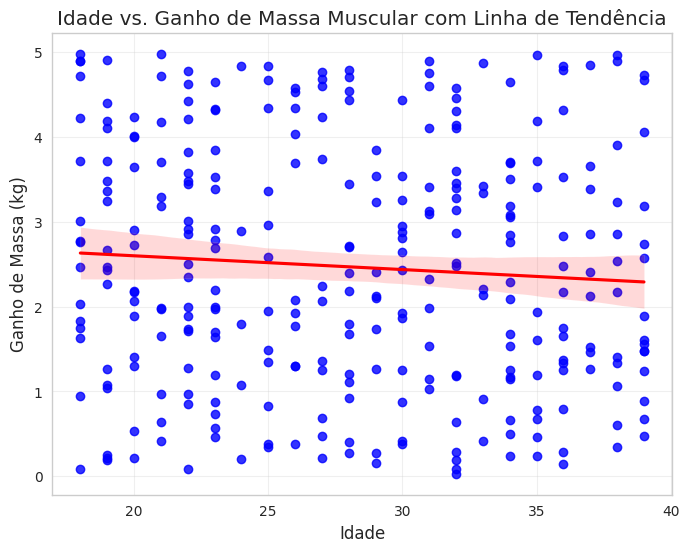

Coeficiente de Correlação de Pearson: -0.07
Valor-p: 0.2052
Não existe correlação estatisticamente significativa.
                            OLS Regression Results                            
Dep. Variable:            ganho_massa   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.612
Date:                Mon, 28 Jul 2025   Prob (F-statistic):              0.205
Time:                        20:22:48   Log-Likelihood:                -533.01
No. Observations:                 300   AIC:                             1070.
Df Residuals:                     298   BIC:                             1077.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

/tmp/ipython-input-18-3080799126.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_faixa = suplementos.groupby('faixa_etaria')['ganho_massa'].mean()
/tmp/ipython-input-18-3080799126.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_por_faixa.index, y=media_por_faixa.values, palette='husl')


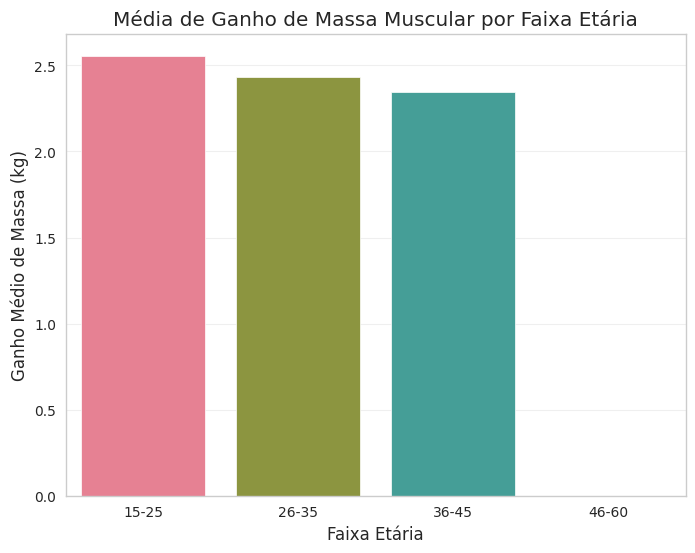

In [18]:
# ------------------------------
# Parte 1: Gráfico com linha de tendência
# ------------------------------
plt.figure(figsize=(8, 6))
sns.regplot(data=suplementos, x='idade', y='ganho_massa', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Idade vs. Ganho de Massa Muscular com Linha de Tendência')
plt.xlabel('Idade')
plt.ylabel('Ganho de Massa (kg)')
plt.grid(True, alpha=0.3)
plt.show()

# ------------------------------
# Parte 2: Correlação de Pearson
# ------------------------------
correlation, p_value = pearsonr(suplementos['idade'], suplementos['ganho_massa'])
print(f'Coeficiente de Correlação de Pearson: {correlation:.2f}')
print(f'Valor-p: {p_value:.4f}')

if p_value < 0.05:
    print("Existe correlação estatisticamente significativa.")
else:
    print("Não existe correlação estatisticamente significativa.")

# ------------------------------
# Parte 3: Regressão Linear Simples
# ------------------------------
X = suplementos['idade']
y = suplementos['ganho_massa']

# Adicionar constante para o modelo (obrigatório)
X_const = sm.add_constant(X)

# Ajustar o modelo
modelo = sm.OLS(y, X_const).fit()

# Exibir o resumo da regressão
print(modelo.summary())

# ------------------------------
# Parte 4: Comparação por faixas etárias
# ------------------------------
# Criar uma nova coluna de faixa etária
suplementos['faixa_etaria'] = pd.cut(suplementos['idade'], bins=[15, 25, 35, 45, 60], labels=['15-25', '26-35', '36-45', '46-60'])

# Visualizar médias por faixa etária
media_por_faixa = suplementos.groupby('faixa_etaria')['ganho_massa'].mean()
print('\nMédia de ganho de massa por faixa etária:')
print(media_por_faixa)

# Plotar as médias por faixa etária
plt.figure(figsize=(8, 6))
sns.barplot(x=media_por_faixa.index, y=media_por_faixa.values, palette='husl')
plt.title('Média de Ganho de Massa Muscular por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Ganho Médio de Massa (kg)')
plt.grid(axis='y', alpha=0.3)
plt.show()


#4. Atletas que treinam mais frequentemente ganham mais massa muscular independentemente do suplemento?


In [19]:
# Teste de Spearman
corr, p_value = spearmanr(suplementos['frequencia_treino'], suplementos['ganho_massa'])

print(f"Coeficiente de Spearman (ρ): {corr:.3f}")
print(f"Valor-p: {p_value}")

# Interpretação
alpha = 0.05
if p_value < alpha:
    if corr > 0:
        print("Rejeitamos H₀: Há correlação positiva (mais treino = mais ganho de massa).")
    else:
        print("Rejeitamos H₀: Há correlação negativa (mais treino = menos ganho de massa).")
else:
    print("Não rejeitamos H₀: Não há correlação significativa.")

Coeficiente de Spearman (ρ): 0.074
Valor-p: 0.2032926876159891
Não rejeitamos H₀: Não há correlação significativa.


In [20]:
#Teste Kruskal-Wallis (para grupos de frequência de treino):

# Separar os dados em grupos (ex: 2-3 dias, 4-5 dias, 6+ dias)
grupo_baixo = suplementos[suplementos['frequencia_treino'].isin([2, 3])]['ganho_massa']
grupo_medio = suplementos[suplementos['frequencia_treino'].isin([4, 5])]['ganho_massa']
grupo_alto = suplementos[suplementos['frequencia_treino'] == 6]['ganho_massa']

# Teste Kruskal-Wallis
statistic, p_value = kruskal(grupo_baixo, grupo_medio, grupo_alto)

print(f"\nTeste Kruskal-Wallis (Frequência de Treino):")
print(f"Estatística H: {statistic:.3f}, Valor-p: {p_value}")

if p_value < alpha:
    print("Rejeitamos H₀: Há diferença significativa entre pelo menos dois grupos.")
else:
    print("Não rejeitamos H₀: Não há diferença significativa.")


Teste Kruskal-Wallis (Frequência de Treino):
Estatística H: 4.847, Valor-p: 0.08860288578791833
Não rejeitamos H₀: Não há diferença significativa.


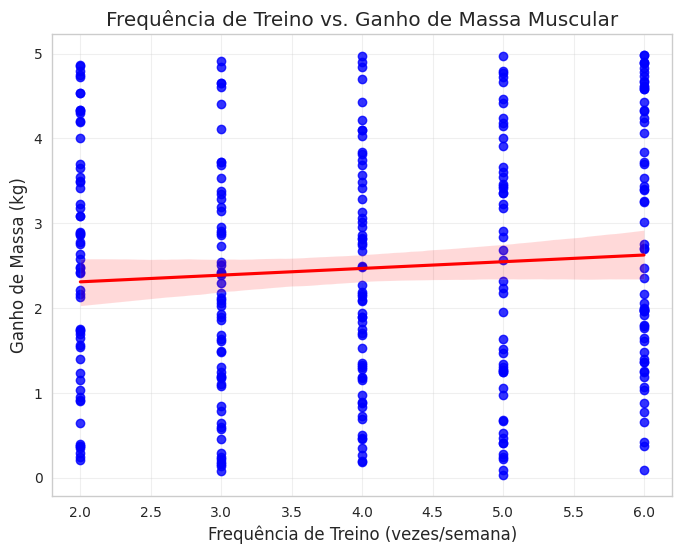

Coeficiente de Correlação de Pearson: 0.08
Valor-p: 0.1742
Não existe correlação estatisticamente significativa entre frequência de treino e ganho de massa muscular.
                            OLS Regression Results                            
Dep. Variable:            ganho_massa   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.855
Date:                Mon, 28 Jul 2025   Prob (F-statistic):              0.174
Time:                        20:22:48   Log-Likelihood:                -532.89
No. Observations:                 300   AIC:                             1070.
Df Residuals:                     298   BIC:                             1077.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err     

/tmp/ipython-input-21-1606497182.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_por_frequencia.index, y=media_por_frequencia.values, palette='husl')


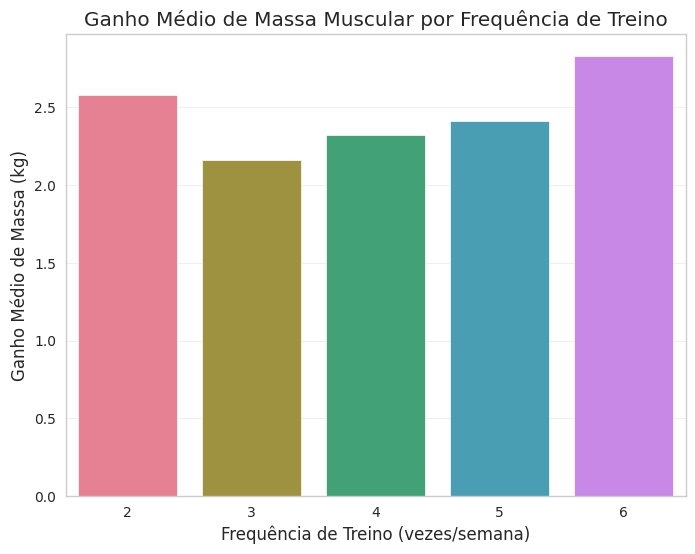

In [21]:
# ------------------------------
# Parte 1: Visualização com regressão
# ------------------------------
plt.figure(figsize=(8, 6))
sns.regplot(data=suplementos, x='frequencia_treino', y='ganho_massa', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Frequência de Treino vs. Ganho de Massa Muscular')
plt.xlabel('Frequência de Treino (vezes/semana)')
plt.ylabel('Ganho de Massa (kg)')
plt.grid(True, alpha=0.3)
plt.show()

# ------------------------------
# Parte 2: Correlação de Pearson
# ------------------------------
correlation, p_value = pearsonr(suplementos['frequencia_treino'], suplementos['ganho_massa'])
print(f'Coeficiente de Correlação de Pearson: {correlation:.2f}')
print(f'Valor-p: {p_value:.4f}')

if p_value < 0.05:
    print("Existe uma correlação estatisticamente significativa entre frequência de treino e ganho de massa muscular.")
else:
    print("Não existe correlação estatisticamente significativa entre frequência de treino e ganho de massa muscular.")

# ------------------------------
# Parte 3: Regressão Linear Simples
# ------------------------------
X = suplementos['frequencia_treino']
y = suplementos['ganho_massa']

# Adicionar constante para o modelo
X_const = sm.add_constant(X)

# Ajustar o modelo
modelo = sm.OLS(y, X_const).fit()

# Exibir o resumo da regressão
print(modelo.summary())

# ------------------------------
# Parte 4: Comparação de médias por frequência de treino
# ------------------------------
media_por_frequencia = suplementos.groupby('frequencia_treino')['ganho_massa'].mean()
print('\nMédia de ganho de massa por frequência de treino:')
print(media_por_frequencia)

# Plotar as médias
plt.figure(figsize=(8, 6))
sns.barplot(x=media_por_frequencia.index, y=media_por_frequencia.values, palette='husl')
plt.title('Ganho Médio de Massa Muscular por Frequência de Treino')
plt.xlabel('Frequência de Treino (vezes/semana)')
plt.ylabel('Ganho Médio de Massa (kg)')
plt.grid(axis='y', alpha=0.3)
plt.show()


#5. Existe alguma correlação entre idade, frequência de treino e a eficácia do suplemento?

In [22]:
# Correlação entre idade e ganho de massa
corr_idade, p_idade = spearmanr(suplementos['idade'], suplementos['ganho_massa'])
print(f"Correlação (Idade vs. Ganho de Massa): ρ = {corr_idade:.3f}, p = {p_idade:.4f}")

# Correlação entre frequência de treino e ganho de massa
corr_treino, p_treino = spearmanr(suplementos['frequencia_treino'], suplementos['ganho_massa'])
print(f"Correlação (Treino vs. Ganho de Massa): ρ = {corr_treino:.3f}, p = {p_treino:.4f}")

# Interpretação
alpha = 0.05
if p_idade < alpha:
    print(f"Idade tem correlação significativa com ganho de massa (ρ = {corr_idade:.3f}).")
if p_treino < alpha:
    print(f"Frequência de treino tem correlação significativa com ganho de massa (ρ = {corr_treino:.3f}).")

Correlação (Idade vs. Ganho de Massa): ρ = -0.077, p = 0.1847
Correlação (Treino vs. Ganho de Massa): ρ = 0.074, p = 0.2033


Não há correlação significativa entre idade/frequência de treino e ganho de massa nos dados atuais.


In [23]:
# Código com prints explicativos para o usuário

# Calculando as correlações e p-valores novamente (para garantir integridade do script)
corr_idade, p_idade = pearsonr(suplementos['idade'], suplementos['ganho_massa'])
corr_treino, p_treino = pearsonr(suplementos['frequencia_treino'], suplementos['ganho_massa'])

# Printando os resultados de forma amigável
print("Análise de Correlação entre variáveis e eficácia do suplemento (ganho de massa):\n")

print(f"1. Idade vs. Ganho de Massa:")
print(f"   - Coeficiente de correlação: {corr_idade:.3f}")
print(f"   - p-valor: {p_idade:.3f}")
if p_idade < 0.05:
    print("   ➔ Existe uma correlação estatisticamente significativa entre idade e ganho de massa.\n")
else:
    print("   ➔ Não foi encontrada correlação significativa entre idade e ganho de massa.\n")

print(f"2. Frequência de Treino vs. Ganho de Massa:")
print(f"   - Coeficiente de correlação: {corr_treino:.3f}")
print(f"   - p-valor: {p_treino:.3f}")
if p_treino < 0.05:
    print("   ➔ Existe uma correlação estatisticamente significativa entre frequência de treino e ganho de massa.\n")
else:
    print("   ➔ Não foi encontrada correlação significativa entre frequência de treino e ganho de massa.\n")

print("Conclusão geral:")
print("Com base nos resultados, não encontramos evidências estatísticas suficientes para afirmar que idade ou frequência de treino influenciam significativamente na eficácia do suplemento em termos de ganho de massa.")


Análise de Correlação entre variáveis e eficácia do suplemento (ganho de massa):

1. Idade vs. Ganho de Massa:
   - Coeficiente de correlação: -0.073
   - p-valor: 0.205
   ➔ Não foi encontrada correlação significativa entre idade e ganho de massa.

2. Frequência de Treino vs. Ganho de Massa:
   - Coeficiente de correlação: 0.079
   - p-valor: 0.174
   ➔ Não foi encontrada correlação significativa entre frequência de treino e ganho de massa.

Conclusão geral:
Com base nos resultados, não encontramos evidências estatísticas suficientes para afirmar que idade ou frequência de treino influenciam significativamente na eficácia do suplemento em termos de ganho de massa.


#6. Qual fórmula você recomendaria para atletas que treinam mais de 5 vezes por semana? Justifique sua escolha.

In [24]:
# Filtrar atletas que treinam mais de 5 vezes por semana
atletas_freq_alta = suplementos[suplementos['frequencia_treino'] > 5]

# Calcular o ganho médio de massa por fórmula para esse grupo
ganho_medio_por_formula = atletas_freq_alta.groupby('id_produto')['ganho_massa'].mean().sort_values(ascending=False)

# Verificar também a contagem de atletas por fórmula para referência
contagem_por_formula = atletas_freq_alta['id_produto'].value_counts()

# Exibir resultados
print("Ganho médio de massa por fórmula (atletas que treinam mais de 5 vezes/semana):")
print(ganho_medio_por_formula)
print("\nQuantidade de atletas por fórmula (para ter uma ideia do tamanho da amostra):")
print(contagem_por_formula)

# Recomendação baseada no maior ganho médio
melhor_formula = ganho_medio_por_formula.idxmax()
print(f"\nRecomendação: A fórmula mais indicada para atletas que treinam mais de 5 vezes por semana é '{melhor_formula}', pois apresentou o maior ganho médio de massa muscular.")


Ganho médio de massa por fórmula (atletas que treinam mais de 5 vezes/semana):
id_produto
Fórmula 1    3.012609
Fórmula 3    2.896000
Fórmula 2    2.566190
Name: ganho_massa, dtype: float64

Quantidade de atletas por fórmula (para ter uma ideia do tamanho da amostra):
id_produto
Fórmula 1    23
Fórmula 2    21
Fórmula 3    20
Name: count, dtype: int64

Recomendação: A fórmula mais indicada para atletas que treinam mais de 5 vezes por semana é 'Fórmula 1', pois apresentou o maior ganho médio de massa muscular.


/tmp/ipython-input-25-426500416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=atletas_freq_alta, x='id_produto', y='ganho_massa', palette='viridis')


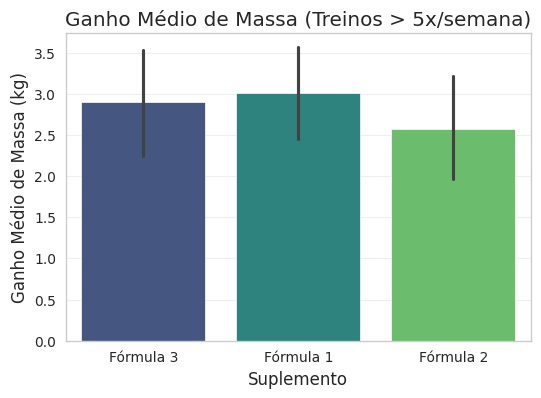

In [25]:
plt.figure(figsize=(6, 4))
sns.barplot(data=atletas_freq_alta, x='id_produto', y='ganho_massa', palette='viridis')
plt.title('Ganho Médio de Massa (Treinos > 5x/semana)')
plt.xlabel('Suplemento')
plt.ylabel('Ganho Médio de Massa (kg)')
plt.grid(axis='y', alpha=0.3)
plt.show()
